<a href="https://colab.research.google.com/github/Logeshwari-2001/Anomaly/blob/main/Anomaly_data_breach_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import sys

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 1.5.3
numpy : 1.22.4
matplotlib : 3.7.1
seaborn : 0.12.2
sklearn : 1.2.2
imblearn : 0.10.1


DATASET

In [ ]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
train = pd.read_csv("/content/KDDTrain.csv", names=datacols) # change path to where the dataset is located.
#eliminating the unwanted extra field
train = train.iloc[:,:-1]

VIEWING THE TRAIN DATA AND DIMENSION

In [ ]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [ ]:
print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

Training data has 125973 rows & 42 columns


VIEWING TEST DATA AND DIMENSION

DATA PREPROCESSING Mapping which means we are considering four types of attacks(dos,u2r,r2l,probe) and then we are having many types under these categories mapping is the process which map these numerous attacks to their respective prime attack fields.

In [ ]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [ ]:
train['attack'] = train['attack'].apply(lambda v: mapping[v])

dropping attack field(i.e replacing the sub attacks with the prime attack names)sub attack->neptune which is replaced by its respective prime attack dos.

In [ ]:
train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,DoS


STATISTICS

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


REMOVING THE UNNECESSARY FIELDS FROM THE DATASET

In [ ]:
train['attack'].value_counts()

Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: attack, dtype: int64

In [ ]:
attack_class_freq_train = train[['attack']].apply(lambda x: x.value_counts())

attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_dist = pd.concat([attack_class_freq_train], axis=1) 
attack_class_dist

,attack,frequency_percent_train
Normal,67343,53.46
DoS,45927,36.46
Probe,11656,9.25
R2L,995,0.79
U2R,52,0.04


SCALING NUMERICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))


# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)


In [ ]:
print(sc_traindf)

        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
125968 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125969 -0.107178  -0.007744  -0.004883 -0.014089       -0.089486 -0.007736   
125970 -0.110249  -0.007382  -0.004823 -0.014089       -0.089486 -0.007736   
125971 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125972 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  num_compromised

ENCODING CATEGORICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack'], axis=1)
cat_Ytrain = traincat[['attack']].copy()

In [ ]:
traincat.head(3)

,protocol_type,service,flag,attack
0,1,20,9,1
1,2,44,9,1
2,1,49,5,0


In [ ]:
print(enctrain)
print(cat_Ytrain)

        protocol_type  service  flag
0                   1       20     9
1                   2       44     9
2                   1       49     5
3                   1       24     9
4                   1       24     9
...               ...      ...   ...
125968              1       49     5
125969              2       49     9
125970              1       54     9
125971              1       30     5
125972              1       20     9

[125973 rows x 3 columns]
        attack
0            1
1            1
2            0
3            1
4            1
...        ...
125968       0
125969       1
125970       1
125971       0
125972       1

[125973 rows x 1 columns]


In [ ]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['attack']
train_x.shape


(125973, 41)

In [ ]:
train_x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,20,9
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2,44,9
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1,49,5
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,24,9
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,24,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.872361,-0.037694,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1,49,5
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2,49,9
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,54,9
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.523041,-0.

In [ ]:
train_y
y=train.attack

FEATURE SELECTION USING RANDOM FOREST CLASSIFIER

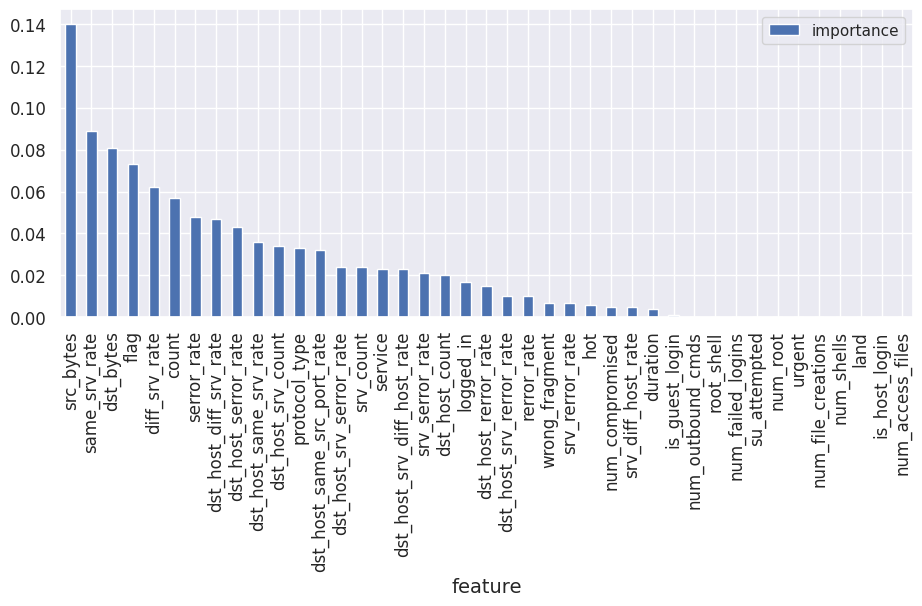

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'protocol_type',
 'service',
 'flag']

In [ ]:
X_train_rfe = rfe.transform(train_x)

#TRAINING THE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

# instantiate the model (using the default parameters)

svm_model = SVC(kernel='rbf', C=10, gamma=0.1,random_state=0)
svm_model.fit(X_train_rfe, y)
logreg = LogisticRegression(n_jobs=-1,random_state=0)
logreg.fit(X_train_rfe, y)



LogisticRegression(n_jobs=-1, random_state=0)

SAVE THE MODEL


In [ ]:
import pickle
with open('svm_model1.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_train_pred = svm_model.predict(X_train_rfe)
accuracy_svm = accuracy_score(y, y_train_pred)
cm_train = metrics.confusion_matrix(y, y_train_pred)

In [ ]:
print(cm_train)

[[43675  1917   335     0     0]
 [  278 66593   472     0     0]
 [  230  1127 10299     0     0]
 [   47   947     1     0     0]
 [    1    51     0     0     0]]


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_train_pred = logreg.predict(X_train_rfe)
accuracy_logreg = accuracy_score(y, y_train_pred)
cm = metrics.confusion_matrix(y, y_train_pred)
print(cm)

[[43367  2151   409     0     0]
 [  580 64553  2210     0     0]
 [  217  1907  9532     0     0]
 [    4   982     9     0     0]
 [    2    40    10     0     0]]


ACCURACY

In [ ]:
print("Accuracy of SVM",accuracy_svm)
print("Accuracy of Logistic Regression",accuracy_logreg)

Accuracy of SVM 0.9848856500996245
Accuracy of Logistic Regression 0.932358521270431
